In [2]:
import re
import random
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
from collections import Counter

random.seed(42)
%matplotlib inline

In [3]:
def replace_with_mask(match):
    # Get the matched digit sequence
    digit_seq = match.group()

    # Choose the mask based on the length of the digit sequence
    if len(digit_seq) == 1:
        return '[1_DIGIT]'
    elif len(digit_seq) == 2:
        return '[2_DIGITS]'
    else:
        return '[MULTI_DIGITS]'

In [4]:
file = open("../data/news.text", mode='r', encoding='utf-8')


In [5]:
content = file.read()

In [6]:
print(len(content))
content[0:100]

967672


'පූර්ණ සුවය ලැබූ නාවික හමුදා සාමාජිකයන් සංඛ්\u200dයාව 250 දක්වා ඉහළට|පොලිස් මුරපොළක් මතට ගසක් කඩාවැටීමෙන් '

In [7]:
headlines = content.split("|")
len(headlines)

18684

In [8]:
headlines[0]

'පූර්ණ සුවය ලැබූ නාවික හමුදා සාමාජිකයන් සංඛ්\u200dයාව 250 දක්වා ඉහළට'

In [9]:
remove_special_char = lambda txt: re.sub(r'[^\w\s\d\u0D80-\u0DFF]','', txt)
remove_text_inside_brackets = lambda txt: re.sub(r'[\[\{\(].*?[\)\}\]]|[^\w\s\d\u0D80-\u0DFF]', '', txt)
remove_multi_spaces = lambda txt: re.sub(r'\s+', ' ', txt)

In [10]:
headlines = list(map(remove_text_inside_brackets,headlines))
headlines = list(map(remove_special_char,headlines))
headlines = list(map(remove_multi_spaces,headlines))

In [11]:
headlines[0]

'පූර්ණ සුවය ලැබූ නාවික හමුදා සාමාජිකයන් සංඛ්යාව 250 දක්වා ඉහළට'

In [12]:
headlines[1111],headlines[1234],headlines[9999]

('ව්යවස්ථාදායක සභාව ප්රථමවරට රැස්වෙයි',
 'හොඳට ඇඳගෙන ඇවිත් කාන්තාවන්ගෙ දේවල් ගන්න අමුතු බොරු ගුරුවරයා මෙන්න',
 'තවත් ආනයනික තෙල් තොගයක් ප්රතික්ෂේපයි')

In [13]:
whole_text = ",".join(t.strip() for t in headlines)
whole_text[0:150]

'පූර්ණ සුවය ලැබූ නාවික හමුදා සාමාජිකයන් සංඛ්යාව 250 දක්වා ඉහළට,පොලිස් මුරපොළක් මතට ගසක් කඩාවැටීමෙන් පොලිස් නිලධාරියෙකුට තුවාල,ශාසන පරිහානියට අදාළ සමාජ '

In [14]:
# Replace all digit sequences with masks based on their length
whole_text = re.sub(r'\d+', replace_with_mask, whole_text)

In [15]:
len(whole_text)

956437

In [16]:
whole_text[0:1000]

'පූර්ණ සුවය ලැබූ නාවික හමුදා සාමාජිකයන් සංඛ්යාව [MULTI_DIGITS] දක්වා ඉහළට,පොලිස් මුරපොළක් මතට ගසක් කඩාවැටීමෙන් පොලිස් නිලධාරියෙකුට තුවාල,ශාසන පරිහානියට අදාළ සමාජ මාධ්ය පුවත් ගැන අමරපුර මහා සංඝ සභාවෙන් නිවේදනයක්,පාසල් දරුවන්ගේ සෞඛ්යාරක්ෂාව වෙනුවෙන් ක්රියාත්මක ජාතික වැඩපිළිවෙළ ගැන අසත්ය ප්රචාර පතුරවන්න එපා අධ්යාපන ඇමති,අම්ෆන් සුළි සුළඟින් හානියට පත් ජනතාවට සහන දෙන්න අගමැති මෝදිගෙන් කෝටි දහසක්,ඡන්ද දිනයට එරෙහි පෙත්සම් විභාගය ලබන අඟහරුවාදා දක්වා කල් තැබේ,කොම්පඤ්ඤවීථියේ නිවසක ගින්නක්,මාළිගාවත්තේදී කාන්තාවන් තිදෙනෙකු තෙරපී මියයාමේ සිද්ධිය සම්බන්ධයෙන් අධිකරණය වැඩිදුර වාර්තාවක් කැඳවයි,තවත් ආසාදිතයෙකු හඳුනා ගැනේ මෙරට ආසාදිතයන් සංඛ්යාව [MULTI_DIGITS]ක් දක්වා ඉහළට,ද ෆිනෑන්ස් කම්පැනි පීඑල්සී ආයතනයේ බලපත්රය අවලංගු කෙරේ,[MULTI_DIGITS] දෙනෙකු රැගත් ගුවන්යානයක් කරච්චි ගුවන්තොටුපල ආසන්නයේදී කඩා වැටෙයි,විදෙස්ගත ශ්රී ලාංකික ශ්රමිකයින් [MULTI_DIGITS]ක් පමණ කොවිඩ් [2_DIGITS] වෛරසයට ගොදුරු වී ඇතැයි තොරතුරු,ගම්වාසීන්ට කොටුවූ වනජීවී නිලධාරීන්,ගත වූ පැය විසි හතරේ චීනයෙන් කොරෝනා ආසාදිතයින් වාර්තා වී නැහැ,තරුණිය

In [17]:
# ---------------------- clensing completed ---------------------------------

In [18]:
words = whole_text.replace(","," ").split(" ")

In [19]:
content_word_count = Counter(words)

In [20]:
sort_key = lambda item: -item[1]

In [21]:
content_word_count = dict(sorted(content_word_count.items(), key=sort_key))
len(content_word_count)

20721

In [22]:
rare_words = {key:value for key,value in content_word_count.items() if value < 2}

In [23]:
len(rare_words)

10976

In [24]:
# all texts only appears in one time in the headlines
rare_words_list = list(rare_words.keys())
len(rare_words_list)

10976

In [25]:
rare_words_list[0:10]

['මුරපොළක්',
 'පරිහානියට',
 'සෞඛ්යාරක්ෂාව',
 'පතුරවන්න',
 'අම්ෆන්',
 'කොම්පඤ්ඤවීථියේ',
 'මාළිගාවත්තේදී',
 'කම්පැනි',
 'පීඑල්සී',
 'ගොදුරු']

In [26]:
len(rare_words_list) * 100/len(content_word_count)

52.97041648569085

In [27]:
# aroung 52% words are rare :0

In [28]:
final_texts = []

for text in whole_text.split(","):
    count = 0
    for char in text:
        if char not in rare_words_list:
            count += 1
    if count == len(text):
        final_texts.append(text)

In [29]:
len(final_texts)

3887

In [30]:
final_texts[0:10]

['අධික වේගයෙන් ධාවනය වූ යතුරුපැදියක් ගේට්ටුවක ගැටී තරුණයෙක් ජීවිතක්ෂයට',
 'ඇමති ආරුමුගම් තොණ්ඩමන් අභාවප්රාප්ත වෙයි',
 'නිල්වලා ගඟේ ජල මට්ටම පහළට',
 'වරිපනම් බඳු ඉහල නොදැමීමේ තීරණයක්',
 'නිල්වලා ගඟේ ජල මට්ටම ඉහළ යෑමේ අවදානමක්',
 'අම්බලන්තොටදී තියුණු ආයුධයකින් පහරදී පුද්ගලයෙකු ඝාතනය කෙරේ',
 'බඹර ප්රහාරයකට ලක්වීමෙන් ලිඳුල ප්රදේශයේ කාන්තාවක් මරුට',
 'ඡන්ද පත්රිකා මුද්රණය කිරීම ඇරඹේ',
 'දිවයිනටම පනවා තිබූ ඇඳිරි නීතිය ඉවතට',
 'විශේෂ පෙරහුරු මැතිවරණය හෙට අම්බලන්ගොඩදී']

In [31]:
words = " ".join(x for x in final_texts).split(" ")

In [32]:
len(words)

22774

In [33]:
words[:10]

['අධික',
 'වේගයෙන්',
 'ධාවනය',
 'වූ',
 'යතුරුපැදියක්',
 'ගේට්ටුවක',
 'ගැටී',
 'තරුණයෙක්',
 'ජීවිතක්ෂයට',
 'ඇමති']

In [34]:
unique_words = list(Counter(words).keys())
len(unique_words)

7070

In [35]:
wtoi = {w:i+1 for i,w in enumerate(unique_words)}
wtoi['.'] = 0
itow = {i:s for s,i in wtoi.items()}

In [36]:
len(wtoi)

7071

In [39]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [120]:
# build the dataset
block_size = 2 # context length: how many characters do we take to predict the next one?

def build_dataset(final_texts):  
    X, Y = [], []
    for headline in final_texts:
        context = [0] * block_size
        for w in headline.split(" ") + ['.']:
            ix = wtoi[w]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix] # crop and append
    X = torch.tensor(X).to(device)
    Y = torch.tensor(Y).to(device)
    
    print(X.shape, Y.shape)
    return X, Y

In [121]:
random.shuffle(final_texts)
n1 = int(0.8*len(final_texts))
n2 = int(0.9*len(final_texts))

In [122]:
Xtr, Ytr = build_dataset(final_texts[:n1])
Xdev, Ydev = build_dataset(final_texts[n1:n2])
Xte, Yte = build_dataset(final_texts[n2:])

torch.Size([21367, 2]) torch.Size([21367])
torch.Size([2709, 2]) torch.Size([2709])
torch.Size([2585, 2]) torch.Size([2585])


In [123]:
N = len(wtoi)

In [124]:
g = torch.Generator(device=device).manual_seed(2147483647) # for reproducibility
C = torch.randn((N, 30), generator=g, device=device)
W1 = torch.randn((block_size * 30, 4098), generator=g, device=device)
b1 = torch.randn(4098, generator=g, device=device)
W2 = torch.randn((4098, N), generator=g, device=device)
b2 = torch.randn(N, generator=g, device=device)
parameters = [C, W1, b1, W2, b2]

In [125]:
sum(p.nelement() for p in parameters) # number of parameters in total

29446137

In [126]:
for p in parameters:
    p.requires_grad = True

In [127]:
lri = []
lossi = []
stepi = []

In [129]:
for i in range(25_000):
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (128,))
  
    # forward pass
    emb = C[Xtr[ix]] # (32, 3, 10)
    h = torch.tanh(emb.view(-1, 60) @ W1 + b1) # (32, 200)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    #print(loss.item())
  
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
  
    # update
    #lr = lrs[i]
    lr = 0.1 if i < 10000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    #lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())

    if i % 1000 == 0:print(loss.item())

print(loss.item())

239.61325073242188
58.63340377807617
27.896955490112305
7.801886558532715
5.072539806365967
3.9323651790618896
3.2765917778015137
4.4334797859191895
2.999872922897339
2.8759336471557617
3.696308135986328
2.9897661209106445
2.098456382751465
2.566317081451416
1.9274406433105469
2.3013296127319336
2.5679218769073486
2.3833694458007812
2.339508533477783
1.9123048782348633
2.189218759536743
2.1404714584350586
2.2000679969787598
2.1182146072387695
2.5102949142456055
2.078373432159424


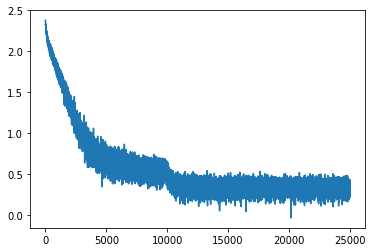

In [130]:
plt.plot(stepi, lossi)

In [171]:
def generate_text(input_text,n_words=3):
  input_words_enc = [wtoi[w] for w in input_text.split()]
  emb = C[torch.tensor([input_words_enc])]
  h = torch.tanh(emb.view(1, -1) @ W1 + b1)
  logits = h @ W2 + b2
  probs = F.softmax(logits, dim=1)
  ix = torch.multinomial(probs, num_samples=n_words, generator=g).detach()
  # print(ix)
  print("Next words in the sequance\n")
  for t in ix.view(n_words,-1):
    print(" -",itow[t.item()])

In [174]:
generate_text("අගමැති කරන්නැයි")

Next words in the sequance

 - අභියෝගයක්
 - උපදේශක
 - පාලනයකට


In [178]:
generate_text("අගමැති උපදේශක")

Next words in the sequance

 - රොෂාන්ට
 - පිළිම
 - .


In [175]:
generate_text("කාන්තාවක් වත්තලදී")

Next words in the sequance

 - අත්අඩංගුවට
 - පාවාදීමේ
 - .


In [176]:
generate_text("වත්තලදී අත්අඩංගුවට")

Next words in the sequance

 - .
 - ජයලලිතා
 - තොටුපළේ
